In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Methods required for K-Means

In [3]:
# randomly assign centroids from data
def InitializeRandomCentroidsFromData(data, points):
    RandomIdx = np.random.permutation(data.shape[0])
    Centroids = data[RandomIdx[:points]]

    return Centroids

In [38]:
# assign the data points a cluster
def AssignCluster(data, centroids):
    cluster = np.zeros(data.shape[0], dtype = int)
    ## looping code
    # for i in range(data.shape[0]):
        # distance = []
        # for j in range(centroids.shape[0]):
        #     dist = np.linalg.norm(data[i] - centroids[j])
        #     distance.append(dist) # to compute square distance
        # cluster[i] = np.argmin(distance) # gives the index of the min element in the array

        ## vectorized code for faster calculation
    distances = np.square(data[:, np.newaxis, :] - centroids[np.newaxis, :, :]).sum(axis = 2)
    cluster = np.argmin(distances, axis = 1)
        
    return cluster

In [54]:
# method to compute new centroids by averaging data points of a cluster
def ComputeNewCentroid(data, k, cluster):
    m, n = data.shape
    centroids = np.zeros((k, n))
    for i in range(k):
        ## traditional method
        # points = data[cluster == i] 
        # centroids[i] = np.mean(points, axis = 0)

        ## using bincount (mask)
        mask = cluster == i
        if mask.any():
            centroids[i] = data[mask].mean(axis = 0)
    return centroids

In [34]:
# compute final centroids based on number of iterations
def RunKMeans(data, centroids, iters):
    cluster = np.zeros(centroids.shape[0])
    for i in range(iters):
        cluster = AssignCluster(data, centroids)
        centroids = ComputeNewCentroid(data, centroids.shape[0], cluster)
    return centroids, cluster

## Image Compression

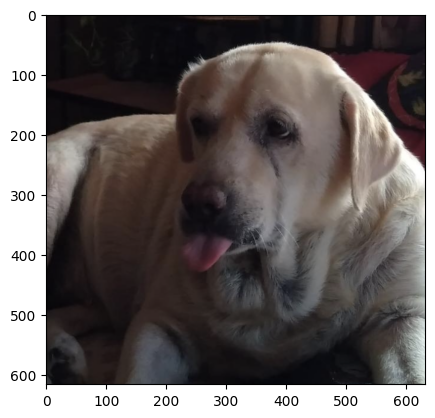

In [7]:
# read and display image 
OgImg = plt.imread("doggy.png")
plt.imshow(OgImg)

In [8]:
m, n = OgImg.shape[0], OgImg.shape[1]

In [24]:
ScaledImg = OgImg[:, :, :3] / 255
Img = np.reshape(ScaledImg, (m * n, 3)) # reshape to get into (no. of pixels, 3) dimension

In [10]:
print(f"Shape of original image: {OgImg.shape}\nShape of image used for compression: {Img.shape}")

Shape of original image: (616, 632, 4)
Shape of image used for compression: (389312, 3)


In [11]:
# set number of clusters(number of colours to compress to) and iterations
points = 16
iters = 10

In [17]:
# initialize centroids randomly
InitCentroids = InitializeRandomCentroidsFromData(Img, points)

In [55]:
# compress using KNN
start = time.perf_counter()
Centroids, Clusters = RunKMeans(Img, InitCentroids, iters)
end = time.perf_counter()
print(f"Time elapsed in compressing: {end - start:2f}s")

Time elapsed in compressing: 0.851697s


In [56]:
Clusters.shape

(389312,)

In [60]:
CompressedImg = Centroids[Clusters, :]
CompressedImg = np.reshape(CompressedImg, (m, n, 3)) # reshape to deflatten
CompressedImg = CompressedImg * 255 # rescale back to get colour image

ValueError: cannot reshape array of size 1167936 into shape (389312,3,3)

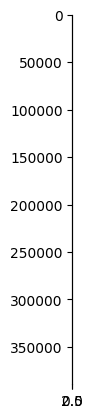

In [58]:
plt.imshow(CompressedImg)

In [59]:
CompressedImg.shape

(389312, 3)